For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.

   Formula: Energy = 3.031419466769302 * Net_Activity + 4.399472432285609
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

   An unbiased estimator is an estimator where the errors are distrubuted equally, meaning that the model is not sceued any way.
   An unbiased estimator will therefore mean a model where the mean sum of all errors is close to 0. 

---

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

Formula: Energy = 3.1587839309902943 * Net_Activity + 1.6404551603765203


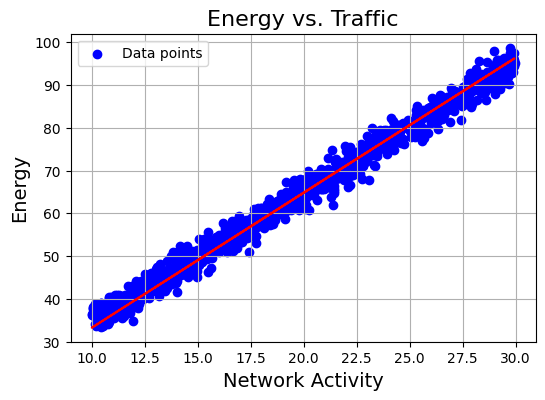

In [53]:
lr = LinearRegression()

data = pd.read_csv('mission1.csv')

lr.fit(data[['Net_Activity']], data['Energy'])

lr.predict(data[['Net_Activity']])

x = lr.weights
y = lr.bias

def f(a):
    return x * a + y

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.plot(data['Net_Activity'], f(data['Net_Activity']), c='red')

print(f'Formula: Energy = {x[0]} * Net_Activity + {y}' )

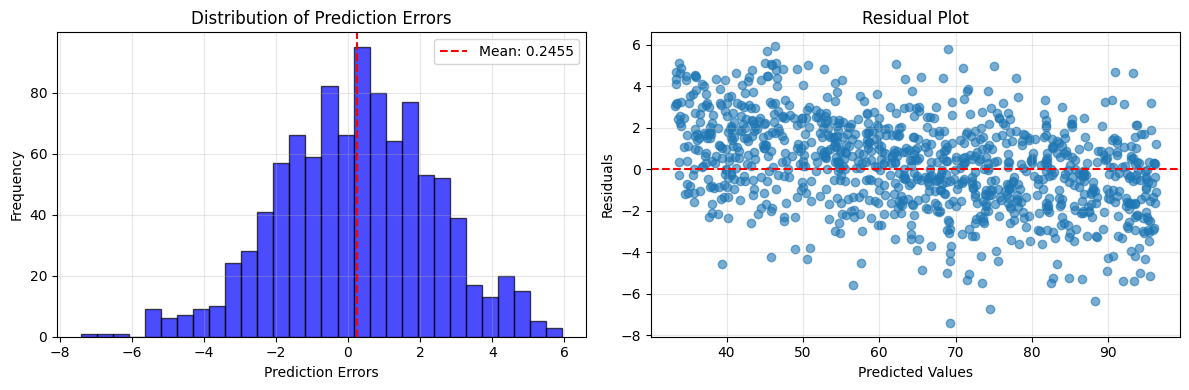

In [54]:

y_pred = lr.predict(data[['Net_Activity']])
errors = data['Energy'] - y_pred

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(errors), color='red', linestyle='--', label=f'Mean: {np.mean(errors):.4f}')
plt.xlabel('Prediction Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_pred, errors, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   The poor initial preformance was due to us having a model using first degree polynomal, when the data was multipolinomal (third degree). This resulted in us underfitting the model the first time. We used feature engineering to transform the train data.

   b. What is the model's inductive bias. Why is it important?

   Inductive bias is assumptions the model makes to generalize pedictions. In our case we used feature engineering to guide the model to a polynomal model. Having the incuctive bias using polynomial features, was in our case more correct than linear. It is impotant to have the correct incutive biases to guide the model in the right direction.

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?

    DecisionTreeClassifier can solve the problem because the targets can be relativly precicely split using a splitting criteria for x0 and x1. This is visualized using the decision boundary display under.
    
   
   d. Plot the ROC curve

---

In [7]:
from logistic_regression import LogisticRegression

data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

poly = PolynomialFeatures(3, include_bias=False)

train_features = pd.DataFrame(poly.fit_transform(train[['x0', 'x1']]))

test_features = pd.DataFrame(poly.transform(test[['x0', 'x1']]))

logr = LogisticRegression(epochs=1000, learning_rate=0.01)
logr.fit(train_features, train['y'])

logr_test_preds = logr.predict(test_features)

accuracy_logr = np.mean(logr_test_preds == test['y'])
print(accuracy_logr)

0.902


0.902


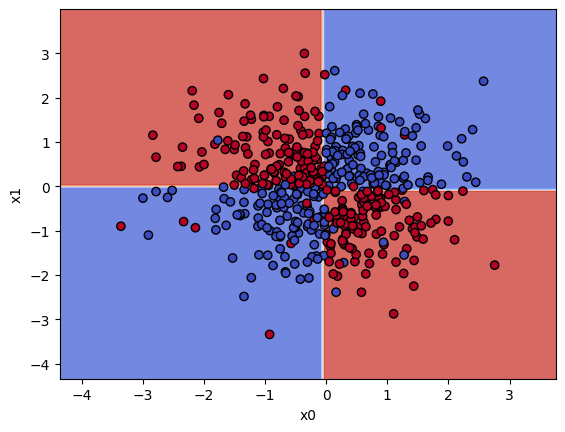

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=2, criterion='log_loss')
clf.fit(train[['x0', 'x1']], train['y'])

clf_test_preds = clf.predict(test[['x0', 'x1']])

accuracy_clf = np.mean(clf_test_preds == test['y'])
print(accuracy_clf)

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    train[['x0', 'x1']],
    response_method='predict',
    xlabel='x0',
    ylabel='x1', 
    alpha=0.8,
    cmap=plt.cm.coolwarm
)

disp.ax_.scatter(train[['x0']], train[['x1']],
                 c=train['y'], edgecolor='k',
                 cmap=plt.cm.coolwarm)
plt.show()


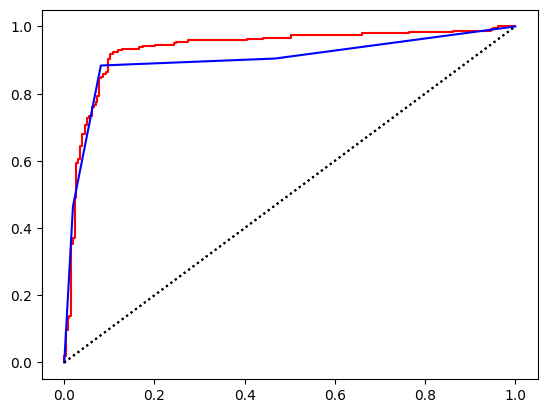

In [57]:
logr_test_proba = logr.predict_proba(test_features)
clf_test_proba = clf.predict_proba(test[['x0', 'x1']])[:, 1]

fpr_logr, tpr_logr, thresholds = metrics.roc_curve(test['y'], logr_test_proba, pos_label=1) 
fpr_clf, tpr_clf, thresholds = metrics.roc_curve(test['y'], clf_test_proba, pos_label=1) 

auc_logr = round(metrics.roc_auc_score(test['y'], logr_test_proba), 2) 
auc_clf = round(metrics.roc_auc_score(test['y'], clf_test_proba), 2) 


plt.plot(fpr_logr, tpr_logr, label=f"ROC curve (AUC={auc_logr})", c="red") 
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")

plt.plot(fpr_clf, tpr_clf, label=f"ROC curve (AUC={auc_clf})", c="blue") 
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

Decision tree auc: 0.7282240563463477


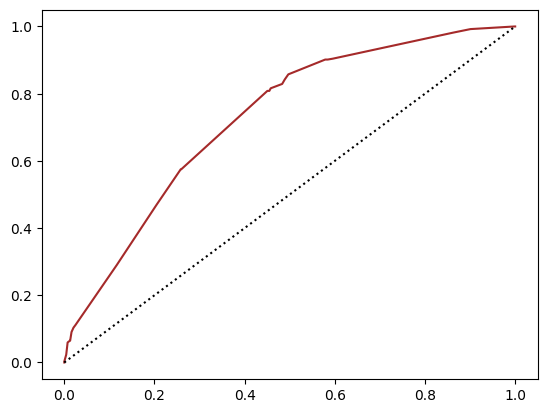

In [58]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

def convert_stream(x: pd.DataFrame):
        converted = [0 if np.floor(abs(i)*1000)%2 == 0 else 1 for i in x]
        return converted

x_train = train.iloc[:, :-1]
x_test = test.iloc[:, :-1]

x_train["data_stream_3"] = convert_stream(x_train["data_stream_3"].values)
x_test["data_stream_3"] = convert_stream(x_test["data_stream_3"].values)

y_train = train['target']
y_test = test['target']

tre = tree.DecisionTreeClassifier(max_depth=5, criterion='gini')

tre.fit(x_train, y_train)

proba_tre = tre.predict_proba(x_test)[:,1]
auc_tre = metrics.roc_auc_score(y_test, proba_tre)
print(f'Decision tree auc: {auc_tre}')
 
fpr_tre, tpr_tre, thresholds = metrics.roc_curve(y_test, proba_tre, pos_label=1)

plt.plot(fpr_tre, tpr_tre, label=f"ROC curve (AUC={auc_tre})", c="brown") 
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")



Random forest auc: 0.7292914652233372


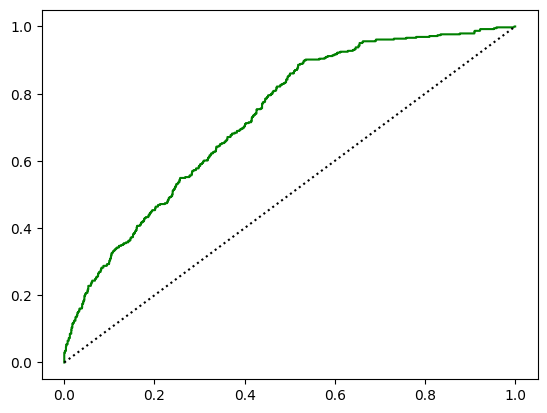

In [59]:
skog = RandomForestClassifier(n_estimators=100, min_samples_leaf=3)
skog.fit(x_train, y_train)
proba_skog = skog.predict_proba(x_test)[:,1]
auc_skog = metrics.roc_auc_score(y_test, proba_skog)
print(f'Random forest auc: {auc_skog}')

fpr_skog, tpr_skog, thresholds = metrics.roc_curve(y_test, proba_skog, pos_label=1)

plt.plot(fpr_skog, tpr_skog, label=f"ROC curve (AUC={auc_skog})", c="green") 
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy
   At first we fixed the test-dataset by shifting the collumns one step to the right. This placed the nexus_rating in the correct position.

   When handling the missing values in the data-set, we first selected only a few of the features to use. After setting up the first ensembler, we found that the RMSLE was a bit off what we wanted. Since the models for Scipy have built in support for missing values, we tried to use all the features in the dataset. This gave us a much better result.

   After that we experimented with different models and hyperparameters until we found a winning combo.

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?
   The data has a large spread, with a few big values. The RMSLE metric mesuares the squared error in log-space, which means that it penalizes relative differences rather than absolute differences. This is useful with our data, that has a few outliers. 

The loss function was the mean squared error, which is the default loss function for the models we used.

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

--- 

In [95]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

# Rotate the columns in the test set (excluding the first column)
cols = test.columns.tolist()
rot_cols = cols[1:]
vals = test[rot_cols].to_numpy()
vals = np.roll(vals, shift=1, axis=1)
test.loc[:, rot_cols] = vals

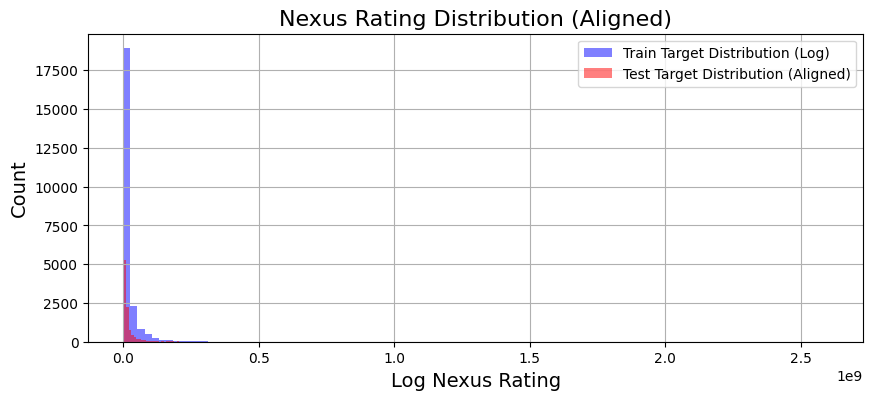

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distribution (Log)')
test['nexus_rating'].hist(bins=100, ax=ax, color='red', alpha=0.5, label='Test Target Distribution (Aligned)')
ax.set_title('Nexus Rating Distribution (Aligned)', fontsize=16)
ax.set_xlabel('Log Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend()
plt.show()

In [98]:
# Handling the missing values and categorical features
# Kategorier som jeg tror er med: 
# "nexus_rating", "energy_footprint", "vertical_alignment", "power_chambers", "grid_connections"

x_train = train.drop(columns=['nexus_rating'])
x_test = test.drop(columns=['nexus_rating'])

y_train = train['nexus_rating']
y_test = test['nexus_rating']

# print(x_train.head())
print(train.isnull().sum())
print(test.isnull().sum())


ownership_type                8830
nexus_rating                     0
energy_footprint                 0
core_reactor_size             4721
harvesting_space              3882
vertical_alignment               0
power_chambers                   0
energy_flow_design           17642
upper_collector_height       11093
shared_conversion_units       3872
isolated_conversion_units     3872
internal_collectors           8072
external_collectors           8072
ambient_harvesters           10520
shielded_harvesters          10520
efficiency_grade              9810
grid_connections                80
dtype: int64
ownership_type               3942
nexus_rating                    0
energy_footprint                0
core_reactor_size            2233
harvesting_space             2019
vertical_alignment              0
power_chambers                  0
energy_flow_design           7368
upper_collector_height       5018
shared_conversion_units      1717
isolated_conversion_units    1717
internal_collector

In [ ]:
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

hgb = HistGradientBoostingRegressor(
    learning_rate=0.05, 
    max_iter=400, 
    max_leaf_nodes=63, 
    min_samples_leaf=12, 
    l2_regularization=0.5, 
    max_bins=255,
    early_stopping=False,
    random_state=42
    )

rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=None,
    min_samples_leaf=2,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

et = ExtraTreesRegressor(
    n_estimators=600,
    max_depth=None,
    min_samples_leaf=2,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

stack = StackingRegressor(
    estimators=[("hgb", hgb), ("rf", rf), ('et', et)],
    final_estimator=RidgeCV(),
    n_jobs=-1
)

stack = TransformedTargetRegressor(
        regressor=stack,
        func=np.log1p,
        inverse_func=np.expm1
        )

stack.fit(x_train, y_train)

y_pred = stack.predict(x_test)

In [102]:
from sklearn.metrics import mean_squared_log_error

count = 0
for x in y_pred:
    if x < 0:
        count += 1

print(count)

def rmsle(y_test, y_pred):
    y_test = np.maximum(y_test, 0)
    y_pred = np.maximum(y_pred, 0)
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

0


In [103]:
print('RMSLE: ', rmsle(y_test, y_pred))
print('Required RMSLE: ', 0.294)

# RMSLE:  0.2953120718850526

RMSLE:  0.2923484176469879
Required RMSLE:  0.294


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd10384d-28df-431e-b0f2-62886eff090a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>